In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#[1] read data
def read_data(data_set_folder):
    dir_lst = []
    cur_dir = os.getcwd()
    data_dir = os.path.join(cur_dir, data_set_folder)
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            dir_lst.append(os.path.join(root, file))
    test_data_dir = dir_lst[1]
    test_labels_dir = dir_lst[2]

    train_data_dir_lst = dir_lst[3:13]
    train_labels_dir_lst = dir_lst[13:]

    return test_data_dir, test_labels_dir, train_data_dir_lst, train_labels_dir_lst


data_folder = 'regression-dataset'
tst_dt_dir, tst_lbl_dir, trn_dt_dirs, trn_lbl_dirs = read_data(data_folder)

In [4]:
#get values
def getDataFrame(dir):
    data = pd.read_csv(dir)
    return data.values

In [5]:
#make training data in one file
training_data = getDataFrame(trn_dt_dirs[0])
for file in range(1, len(trn_dt_dirs)):
    training_data = np.concatenate((training_data, getDataFrame(trn_dt_dirs[file])), axis=0)
training_data.shape

(190, 2)

In [6]:
#make training labels in one file
training_labels = getDataFrame(trn_lbl_dirs[0])
for file in range(1, len(trn_lbl_dirs)):
    training_labels = np.concatenate((training_labels, getDataFrame(trn_lbl_dirs[file])), axis=0)
training_labels.shape

(190, 1)

In [5]:
#read file by file, batchs
for dir in range(len(trn_dt_dirs)):
    X = getDataFrame(trn_dt_dirs[dir])
    Y = getDataFrame(trn_lbl_dirs[dir])


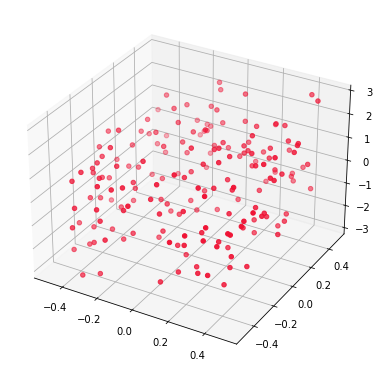

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_data[:,0], training_data[:,1], training_labels, color='#ef1234')
plt.show()

In [8]:
#num_exambles
m = training_data.shape[0]


In [9]:
#add intercept col to features
x0 = np.ones(m)
X = np.array([x0, training_data[:,0], training_data[:,1]]).T
Y = training_labels
#theta = np.random.rand(X.shape[1])
B = np.array([0, 0, 0])

In [10]:
#cost function
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J


In [16]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

150.3532480205715


In [14]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [32]:
newB, cost_history = gradient_descent(X, Y.flatten(), B, 0.01, 1000000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[0.11915159 0.40993221 1.57868421]
0.6683131936462757


In [34]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y.flatten(), Y_pred))
print(r2_score(Y.flatten(), Y_pred))

1.1561255932175154
0.14918702624098423


In [38]:
training_data.shape
training_labels = training_labels.flatten()
training_labels.shape

(190,)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = training_data
Y = training_labels

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

1.1561255932175154
0.149187026240985
